## 6. Decision Trees 결정 트리

### 6.1 결정크리 학습과 시각화

In [16]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(1234)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save images

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH =os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi = resolution)


In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [18]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


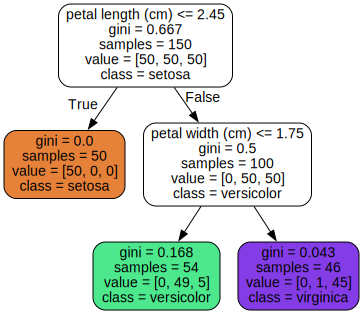

In [19]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

### 6.2 예측하기 

그림저장: decision_tree_decision_boundaries_plot


<function matplotlib.pyplot.show(close=None, block=None)>

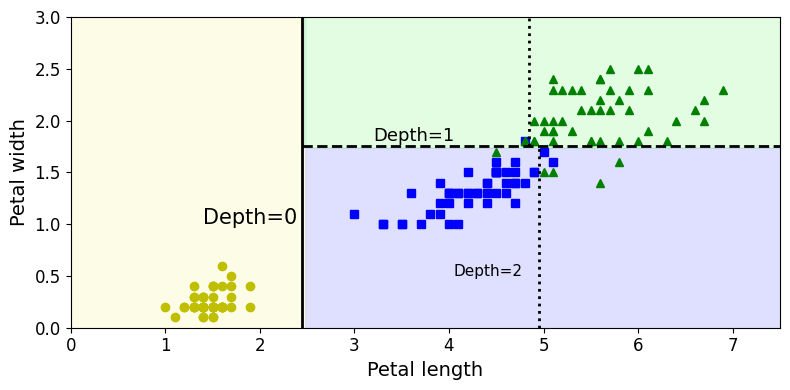

In [21]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes = [0, 7.5, 0, 3], iris=True, legend = False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:,0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:,0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:,0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize =14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
                   
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.8, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "Depth=2", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show

### 6.3 클래스 확률 추정

In [22]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [23]:
tree_clf.predict([[5, 1.5]])

array([1])

### 6.4 CART 훈련 알고리즘

### 6.5 계산복잡도

### 6.6 지니 불순도 또는 엔트로피

### 6.7 규제 매개변수
#### (회전 같은) 데이터셋의 작은 변화가 매우 다른 결정 트리를 만들었다.
#### 사이킷런에서 사용하는 CART 훈련 알고리즘은 확률적이기 때문에 동일한 데이터에서 같은 모델을 훈련하여 매번 매우 다른 모델을 만들 수 있다. 
#### 이를 확인하기 위해 random_state를 다른 값으로 지정

In [24]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

그림저장: decision_tree_instability_plot


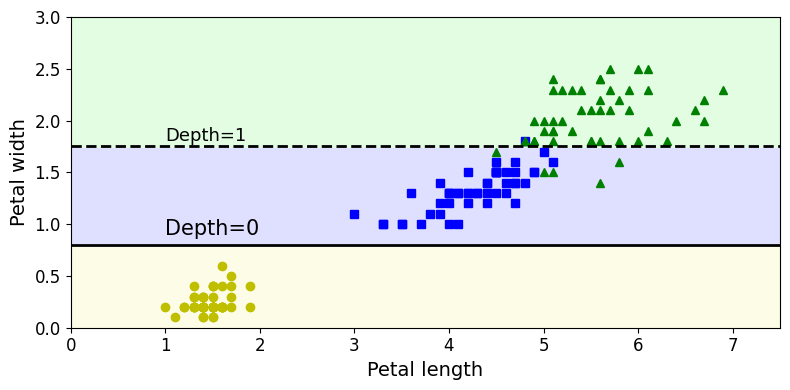

In [26]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
save_fig("decision_tree_instability_plot")
plt.show()

그림저장: min_samples_leaf_plot


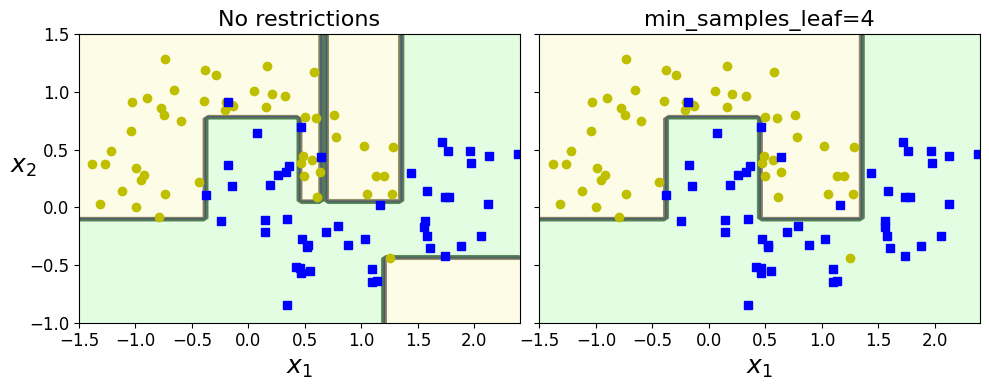

In [30]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf={}".format(deep_tree_clf2.min_samples_leaf) , fontsize=16)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

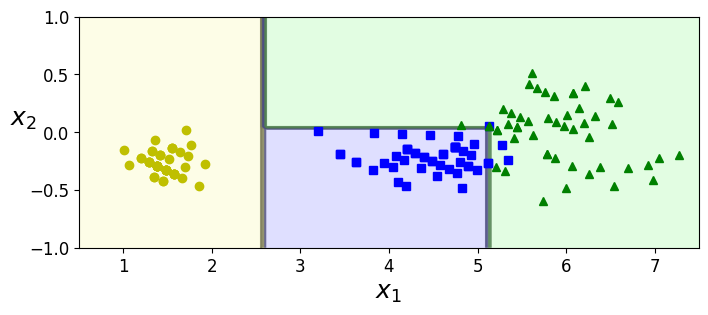

In [33]:
# 데이터셋을 회전하면 완전히 다른 결정 경꼐를 만듬.

angle = np.pi / 180*20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris = False)

plt.show()

그림저장: sensitivity_to_rotation_plot


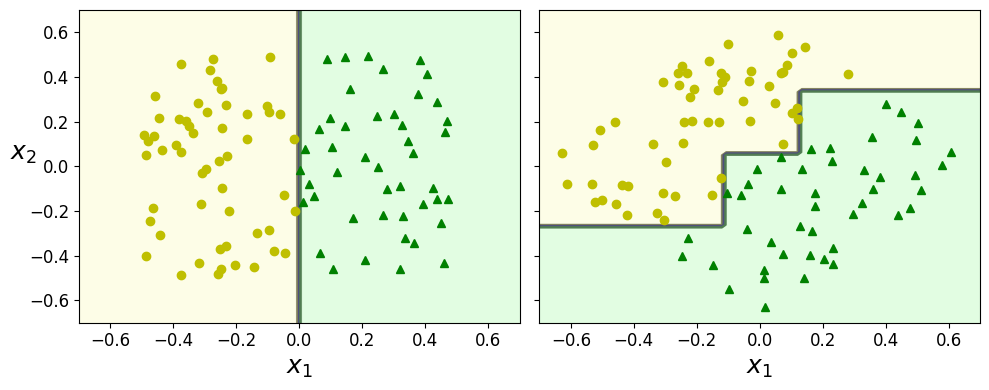

In [39]:
# 훈련세트의 회전에 민감한 결정 트리

np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0]>0).astype(np.float32)*2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize = (10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris = False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris = False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

### 6.8 회귀

In [40]:
# 2차식으로 만든 데이터셋 + 잡음

np.random.seed(123)
m = 200
X = np.random.rand(m, 1)
y = 4*(X - 0.5)**2
y = y + np.random.randn(m, 1)/10


In [41]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

그림저장: tree_regression_plot


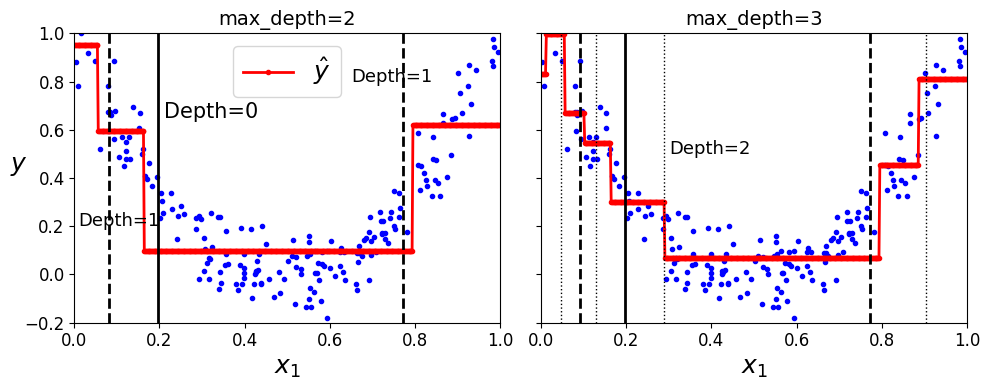

In [46]:
# 두 개의 결정 트리 회귀 모델의 예측

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes = [0,1,-0.2,1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0817, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [48]:
# 회귀 결정 트리 

export_graphviz(
tree_reg1, out_file= os.path.join(IMAGES_PATH, "regression_tree.dot"),
feature_names=["x1"], rounded=True, filled=True)

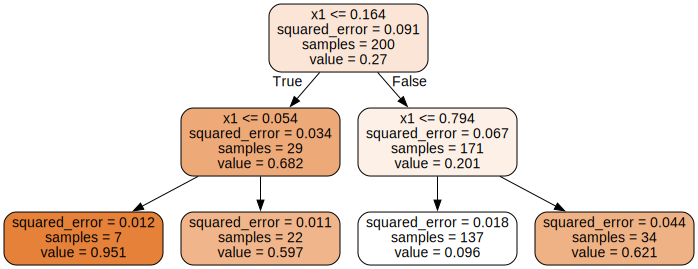

In [49]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

그림저장: tree_regression_regularization_plot


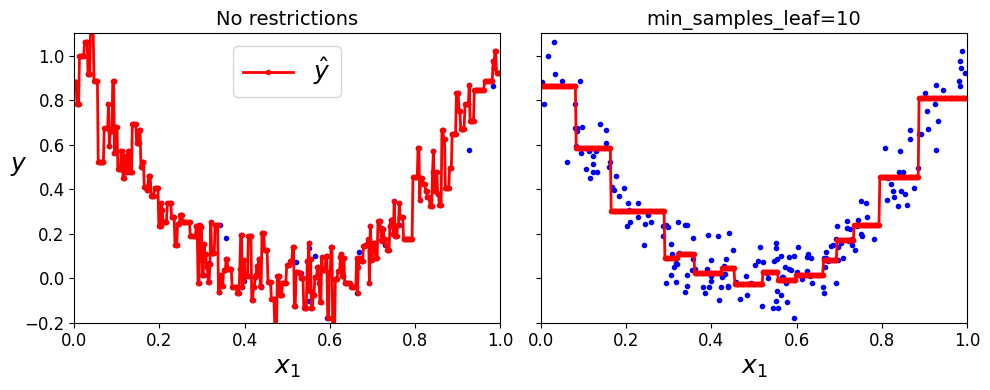

In [50]:
# 결정트리 회귀모델의 규제

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

### 6.9 불안정성

### 연습문제

In [53]:
## 7. moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝하세요

## a. make_moos(n_samples=1000, noise=0.4)를 사용해 데이터셋을 생성

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)  # random_state=42 이 함수의 무작위성을 컨트롤해서 재현 가능한 결과를 얻을 수 있음


In [55]:
## b. train_test_split()을 사용해 훈련세트와 테스트 세트로 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [57]:
## c. DecisionTreeClassifier의 최적의 매개변수 찾기, 교차검증과 함께 그리드 탐색 수행

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split':[2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [58]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

In [60]:
## d. 찾은 매개변수를 사용해 전체 훈현세트에 대해 모델 훈련, 
## 테스트 세트에서 성능 측정

from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

In [64]:
## 8. 랜덤포레스트 만들기 
## a. SuffleSplit 이용, 훈련세트의 서브셋을 1000개 생성, 무작위로 선택된 100개의 샘플 담고 있음

from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100
mini_sets = []

rs = ShuffleSplit(n_splits = n_trees, test_size =len(X_train)-n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [66]:
## b. 찾은 최적의 매개변수 사용해 각 서브셋에 결정트리 훈련
## 테스트 세트로 1000개의 결정 트리 평가
## 더 작은 데이터셋에서 훈련되었기 때문에 이전 보다 성능이 떨어짐

## sklearn.base clone() 
## Constructs a new estimator with the same parameters.
## Clone does a deep copy of the model in an estimator without actually copying attached data. 
## It yields a new estimator with the same parameters that has not been fit on any data.

from sklearn.base import clone
forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]
accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.817115

In [68]:
## c. 각 테스트 샘플에 대해 1000개의 결정 트리 예측 만들기
## 다수로 나온 예측만 최함(mode사용), 테스트세트에 대한 다수결 예측이 만들어짐 

Y_pred = np.empty([n_trees, len(X_test)], dtype =np.uint8)
##  uint8: 8-bit unsigned integer (0 to 255). 
## Most often this is used for arrays representing images, with the 3 color channels having small integer values (0 to 255)

## enumerate() lets you write Pythonic for loops when you need a count and the value from an iterable

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [69]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [70]:
## d. 테스트 세트에서 예측 평가
## 랜덤포르세트 분류기를 훈련시킴

accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.85